Plot distance and elevation metadata by AWS site
===

Import required modules
---

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
from model import Model
from GCNet import GCNet

Function: Adjust box widths
---

In [2]:
from matplotlib.patches import PathPatch
def adjust_box_widths( ax, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    ##iterating through axes artists:
    for c in ax.get_children():

        ##searching for PathPatches
        if isinstance(c, PathPatch):
            ##getting current width of box:
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:,0])
            xmax = np.max(verts_sub[:,0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)

            ##setting new width of box
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:,0] == xmin,0] = xmin_new
            verts_sub[verts_sub[:,0] == xmax,0] = xmax_new

            ##setting new width of median line
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin,xmax]):
                    l.set_xdata([xmin_new,xmax_new])

AWS metadata
---

In [3]:
A = GCNet("site_info.nc")
A.loadMeta()
nSites = A.getNSites()

siteNames = []
for awsIX in ( range( nSites ) ):
    siteNames.append( A.getName( awsIX ) )

Distance and elevation metadata
---

In [4]:
metaFN1 = 'erai/dist_elev_meta_erai.nc'
metaFile1 = Dataset( metaFN1, 'r' )
closestDist1 = metaFile1.variables['distanceClosest']
closestBias1 = metaFile1.variables['elevationBiasClosest']
interpBias1 = metaFile1.variables['elevationBiasInterp']

metaFN2 = 'cesmle/dist_elev_meta_cesmle.nc'
metaFile2 = Dataset( metaFN2, 'r' )
closestDist2 = metaFile2.variables['distanceClosest']
closestBias2 = metaFile2.variables['elevationBiasClosest']
interpBias2 = metaFile2.variables['elevationBiasInterp']

metaFN3 = 'gis_erai/dist_elev_meta_wrf.nc'
metaFile3 = Dataset( metaFN3, 'r' )
closestDist3 = metaFile3.variables['distanceClosest']
closestBias3 = metaFile3.variables['elevationBiasClosest']
interpBias3 = metaFile3.variables['elevationBiasInterp']

Plot data as boxplots
===

Distance to grid point
---

In [5]:
df1 = pd.DataFrame(columns=['Distance','Source'])
df1['Distance'] = closestDist1[:]
df1['Source'] = "ERAI"

df2 = pd.DataFrame(columns=['Distance','Source'])
df2['Distance'] = closestDist2[:]
df2['Source'] = "CESM LE"

df3 = pd.DataFrame(columns=['Distance','Source'])
df3['Distance'] = closestDist3[:]
df3['Source'] = "WRF"

dfDistance = pd.concat( [ df1, df2, df3 ])

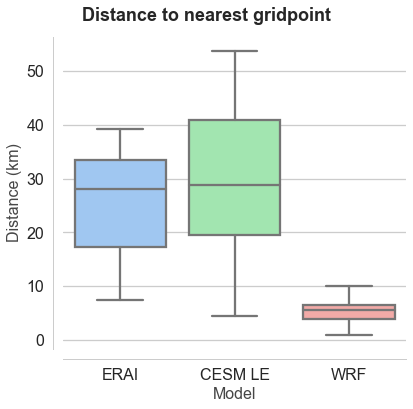

In [15]:
sns.set(style = "whitegrid", palette = "pastel", context = "talk")
fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.boxplot(x="Source", y="Distance", data=dfDistance)

sns.despine(offset=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("Model", size = 16, alpha=0.85);
ax.set_ylabel("Distance (km)", size = 16, alpha=0.85);
fig.suptitle("Distance to nearest gridpoint", fontsize=18, fontweight='bold');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot figure to a file
fmt = 'eps'
ofn = 'grids_distance_closest.'+fmt
fig.savefig(ofn, format=fmt);

Elevation bias, closest point
---

In [7]:
df1 = pd.DataFrame(columns=['Elevation','Source'])
df1['Elevation'] = closestBias1[:]
df1['Source'] = "ERAI"

df2 = pd.DataFrame(columns=['Distance','Source'])
df2['Elevation'] = closestBias2[:]
df2['Source'] = "CESM LE"

df3 = pd.DataFrame(columns=['Distance','Source'])
df3['Elevation'] = closestBias3[:]
df3['Source'] = "WRF"

dfClosestElev = pd.concat( [ df1, df2, df3 ])

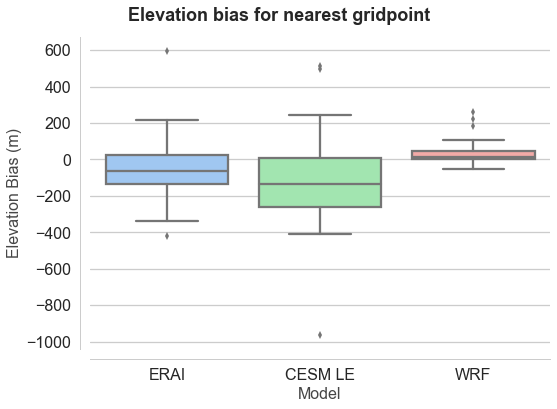

In [8]:
sns.set(style = "whitegrid", palette = "pastel", context = "talk")
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(x="Source", y="Elevation", data=dfClosestElev)

sns.despine(offset=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("Model", size = 16, alpha=0.85);
ax.set_ylabel("Elevation Bias (m)", size = 16, alpha=0.85);
fig.suptitle("Elevation bias for nearest gridpoint", fontsize=18, fontweight='bold');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot figure to a file
fmt = 'eps'
ofn = 'grids_elevbias_closest.'+fmt
fig.savefig(ofn, format=fmt);

Elevation bias, interpolated point
---

In [9]:
df1 = pd.DataFrame(columns=['Elevation','Source'])
df1['Elevation'] = interpBias1[:]
df1['Source'] = "ERAI"

df2 = pd.DataFrame(columns=['Distance','Source'])
df2['Elevation'] = interpBias2[:]
df2['Source'] = "CESM LE"

df3 = pd.DataFrame(columns=['Distance','Source'])
df3['Elevation'] = interpBias3[:]
df3['Source'] = "WRF"

dfInterpElev = pd.concat( [ df1, df2, df3 ])

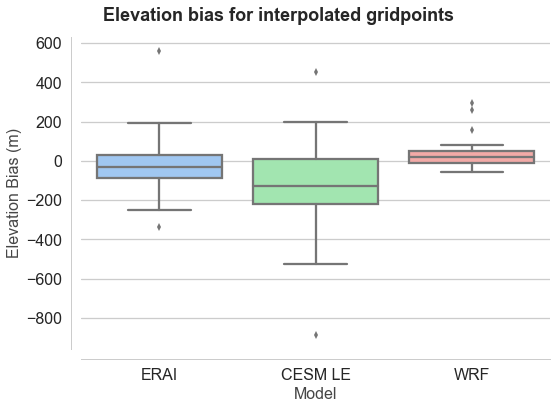

In [10]:
sns.set(style = "whitegrid", palette = "pastel", context = "talk")
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(x="Source", y="Elevation", data=dfInterpElev)

sns.despine(offset=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("Model", size = 16, alpha=0.85);
ax.set_ylabel("Elevation Bias (m)", size = 16, alpha=0.85);
fig.suptitle("Elevation bias for interpolated gridpoints", fontsize=18, fontweight='bold');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot figure to a file
fmt = 'eps'
ofn = 'grids_elevbias_interp.'+fmt
fig.savefig(ofn, format=fmt);

Combined elevation bias plot
---

In [11]:
df1 = pd.DataFrame(columns=['Elevation','Source','Type'])
df1['Elevation'] = closestBias1[:]
df1['Source'] = "ERAI"
df1['Type'] = "Closest"

df2 = pd.DataFrame(columns=['Distance','Source','Type'])
df2['Elevation'] = closestBias2[:]
df2['Source'] = "CESM LE"
df2['Type'] = "Closest"

df3 = pd.DataFrame(columns=['Distance','Source','Type'])
df3['Elevation'] = closestBias3[:]
df3['Source'] = "WRF"
df3['Type'] = "Closest"

df4 = pd.DataFrame(columns=['Elevation','Source','Type'])
df4['Elevation'] = interpBias1[:]
df4['Source'] = "ERAI"
df4['Type'] = "Interpolated"

df5 = pd.DataFrame(columns=['Distance','Source','Type'])
df5['Elevation'] = interpBias2[:]
df5['Source'] = "CESM LE"
df5['Type'] = "Interpolated"

df6 = pd.DataFrame(columns=['Distance','Source','Type'])
df6['Elevation'] = interpBias3[:]
df6['Source'] = "WRF"
df6['Type'] = "Interpolated"

dfCombinedElev = pd.concat( [ df1, df2, df3, df4, df5, df6 ])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


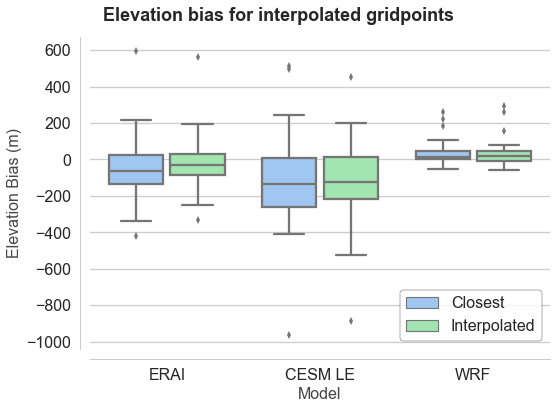

In [12]:
sns.set(style = "whitegrid", palette = "pastel", context = "talk")
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(x="Source", y="Elevation", hue="Type", data=dfCombinedElev)

sns.despine(offset=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("Model", size = 16, alpha=0.85);
ax.set_ylabel("Elevation Bias (m)", size = 16, alpha=0.85);
fig.suptitle("Elevation bias for interpolated gridpoints", fontsize=18, fontweight='bold');

adjust_box_widths(ax, 0.9)

plt.legend(loc="lower right", ncol=1, frameon=True,  \
                             fancybox=True, edgecolor='black', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot figure to a file
fmt = 'eps'
ofn = 'grids_elevbias_both.'+fmt
fig.savefig(ofn, format=fmt);

Plot data as barcharts
----

In [13]:
# barWidth = 0.7
# fig = plt.figure( figsize=(14,25) )
# fig.subplots_adjust(hspace=.25)

# xpos1 = np.arange( 1, nSites+1 )

# ax = plt.subplot( 211 )
# plt.title( 'Distance to nearest ERAI gridpoint',fontsize=20 )
# plt.ylabel( 'Distance (km)',fontsize=18 )
# plt.bar( xpos1, closestDist, width=barWidth, color=(0.2, 0.4, 0.6, 0.6) )
# plt.xticks( xpos1, siteNames, rotation=45, horizontalalignment='right', fontsize=15 )
# plt.yticks( fontsize=16 );
# avg = np.mean( closestDist )
# plt.axhline( avg, linestyle='dashed', color='black', linewidth=4 );
# plt.text(2.5, avg+1, 'Mean', fontsize=16, va='center', ha='center', backgroundcolor='w');

# barWidth = 0.4
# xpos2 = [x + barWidth for x in xpos1]
# ax = plt.subplot( 212 )
# plt.title( 'Elevation bias for nearest ERAI gridpoint',fontsize=20 )
# plt.ylabel( 'Elevation bias (m)',fontsize=18 )
# plt.bar( xpos1, closestBias, width=barWidth, label='Closest',  edgecolor='black' )
# plt.bar( xpos2, interpBias, width=barWidth, label='Interpolated', color='cyan',  edgecolor='black' )
# plt.xticks( xpos2, siteNames, rotation=45, horizontalalignment='right', fontsize=15 )
# plt.yticks( fontsize=16 );
# plt.legend( loc='upper left', prop={'size': 16});
# # avg = np.mean( closestBias )
# # plt.axhline( avg, linestyle='dashed', color='black', linewidth=4 );


In [14]:
# # plot figure to a file
# fmt = 'eps'
# ofn = 'erai_dist_elev_meta.'+fmt
# fig.savefig(ofn, format=fmt);